<a href="https://colab.research.google.com/github/Somesh140/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1) 

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Lets initialize the ANN
classifier=Sequential()

In [ ]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [ ]:
classifier

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [ ]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [ ]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
 dense_16 (Dense)            (None, 10)               

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
tensorflow.keras.optimizers.rm

In [ ]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4752 - accuracy: 0.7940 - val_loss: 0.4299 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4447 - accuracy: 0.7960 - val_loss: 0.4024 - val_accuracy: 0.7975
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4385 - accuracy: 0.7960 - val_loss: 0.4010 - val_accuracy: 0.7975
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4327 - accuracy: 0.7960 - val_loss: 0.4053 - val_accuracy: 0.7975
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4307 - accuracy: 0.7960 - val_loss: 0.3932 - val_accuracy: 0.7975
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.7960 - val_loss: 0.3965 - val_accuracy: 0.7975
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4265 - accuracy: 0.7960 - val_loss: 0.3925 - val_accuracy: 0.7975

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

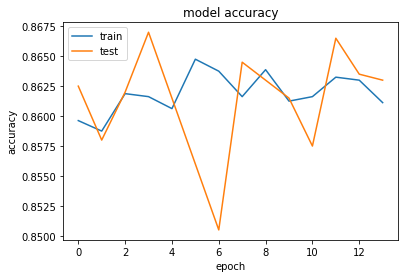

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

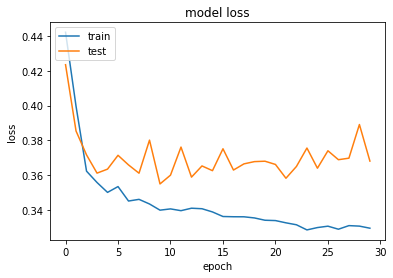

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1531,   64],
       [ 210,  195]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.863

In [ ]:
##get the weights
classifier.get_weights()

[array([[ 2.83990651e-01,  6.45906553e-02,  1.19512770e-02,
          4.21091139e-01,  1.43409729e-01, -2.24721611e-01,
          4.12792772e-01,  1.08177125e-01, -8.27756897e-02,
         -6.53046250e-01],
        [ 4.24592108e-01, -2.80653548e+00,  2.17739964e+00,
         -1.01070690e+00, -2.22881532e+00,  1.02622795e+00,
         -3.53928351e+00,  8.08262348e-01,  8.34652483e-01,
          2.94459641e-01],
        [-1.12461233e+00,  7.99170807e-02,  4.86298800e-01,
          1.45875230e-01, -1.94206759e-02,  1.06198788e+00,
         -6.60594925e-02, -6.63956851e-02,  1.18719772e-01,
          4.84718591e-01],
        [ 2.14120007e+00,  4.70433421e-02, -1.16835751e-01,
         -8.13984752e-01,  2.45520568e+00, -1.42665315e+00,
         -7.84838676e-01, -3.62358713e+00, -3.27638775e-01,
          8.23311388e-01],
        [ 1.20478725e+00, -1.16181523e-01, -5.47897875e-01,
          3.68016315e+00, -2.86625233e-04,  8.60496685e-02,
         -5.51872551e-01, -3.50619102e+00, -3.842875

In [ ]:
## Saving h5 file
classifier.save('model.h5')

In [ ]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [ ]:
classifier1.predict(X_test)

array([[0.29532272],
       [0.1806943 ],
       [0.13595982],
       ...,
       [0.24761881],
       [0.11434659],
       [0.1806943 ]], dtype=float32)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
## Regression
## Divide the dataset into independent and dependent features

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=dataset.iloc[:,12]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [ ]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [ ]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))




In [ ]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [ ]:

regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [ ]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20
   
)

In [ ]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 3284205312.0000 - mae: 49410.9961 - val_loss: 3382805248.0000 - val_mae: 50040.7266
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 3290235904.0000 - mae: 49410.8867 - val_loss: 3358794752.0000 - val_mae: 49852.9688
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 3287846144.0000 - mae: 49354.8477 - val_loss: 3375350016.0000 - val_mae: 50004.6406
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 3290203136.0000 - mae: 49418.8789 - val_loss: 3356946944.0000 - val_mae: 49932.4414
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 3291192832.0000 - mae: 49377.3906 - val_loss: 3355328256.0000 - val_mae: 49901.0234
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 3294118912.0000 - mae: 49474.1094 - val_loss: 3355964160.0000 - val_mae: 49920.2734
Epoch 7/100
800/800 [=========================

In [ ]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

array([[103122.39 ],
       [111224.54 ],
       [ 91467.164],
       ...,
       [103347.67 ],
       [ 96945.79 ],
       [104881.61 ]], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,y_pred))

-0.018634090619355614


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,-0.506242,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.506242,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,-0.506242,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
